In [4]:
!pip install jieba

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/151.4 kB 1.3 MB/s eta 0:00:01
   --------------------- ----------------- 81.9/151.4 kB 907.3 kB/s eta 0:00:01
   -------------------------------- ------- 122.9/151.4 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.1 MB/s eta 0:00:00


In [18]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [21]:
url = "https://zh.wikipedia.org/zh-tw/NBA%E6%9C%80%E6%9C%89%E4%BB%B7%E5%80%BC%E7%90%83%E5%91%98"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"
}

res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, "html.parser")

# 抓取內容

In [31]:
table = soup.find_all("table", class_="wikitable")[1]

# 提取表格的数據
rows = table.find_all("tr")
data = []

for row in rows:
    cols = row.find_all(["th", "td"])
    cols = [col.get_text(strip=True) for col in cols]
    data.append(cols)

# 將數據傳換成dataframe
df = pd.DataFrame(data[1:], columns=data[0])

df

,賽季,姓名,位置,國籍,球隊
0,1955-56,鮑伯·派提特*,前鋒,美國,聖路易老鷹
1,1956-57,鮑伯·庫西*,後衛,美國,波士頓塞爾提克
2,1957-58,比爾·羅素*,中鋒,美國,波士頓塞爾提克（2）
3,1958-59,鮑伯·派提特*（2）,前鋒,美國,聖路易老鷹（2）
4,1959-60,威爾特·張伯倫*,中鋒,美國,費城勇士
...,...,...,...,...,...
63,2018-19,揚尼斯·安戴托昆波^,前鋒,希臘,密爾瓦基公鹿（4）
64,2019-20,揚尼斯·安戴托昆波^（2）,前鋒,希臘,密爾瓦基公鹿（5）
65,2020-21,尼古拉·約基奇^,中鋒,塞爾維亞,丹佛金塊
66,2021-22,尼古拉·約基奇^（2）,中鋒,塞爾維亞,丹佛金塊（2）


In [84]:
#整理dataframe數據內容
df['姓名'] = df['姓名'].str.replace(r'\[注[^\]]*\]', '')
df['國籍'] = df['國籍'].str.replace(r'\[注[^\]]*\]', '')
df['姓名'] = df['姓名'].str.replace(r'[\*\^（\d）]', '')
df['姓名'] = df['姓名'].str.replace(r'\bAaa', '', case=False)
df['球隊'] = df['球隊'].str.replace(r'[\*\^（\d）]', '')
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28056\2563409003.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['姓名'] = df['姓名'].str.replace(r'\[注[^\]]*\]', '')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28056\2563409003.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['國籍'] = df['國籍'].str.replace(r'\[注[^\]]*\]', '')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28056\2563409003.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['姓名'] = df['姓名'].str.replace(r'[\*\^（\d）]', '')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28056\2563409003.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['姓名'] = df['姓名'].str.replace(r'\bAaa', '', case=False)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28056\2563409003.py:6: FutureWarning: The default value of regex will change from True to False 

,賽季,姓名,位置,國籍,球隊
0,1955-56,鮑伯·派提特,前鋒,美國,聖路易老鷹
1,1956-57,鮑伯·庫西,後衛,美國,波士頓塞爾提克
2,1957-58,比爾·羅素,中鋒,美國,波士頓塞爾提克
3,1958-59,鮑伯·派提特,前鋒,美國,聖路易老鷹
4,1959-60,威爾特·張伯倫,中鋒,美國,費城勇士
...,...,...,...,...,...
63,2018-19,揚尼斯·安戴托昆波,前鋒,希臘,密爾瓦基公鹿
64,2019-20,揚尼斯·安戴托昆波,前鋒,希臘,密爾瓦基公鹿
65,2020-21,尼古拉·約基奇,中鋒,塞爾維亞,丹佛金塊
66,2021-22,尼古拉·約基奇,中鋒,塞爾維亞,丹佛金塊


# 圖表製作

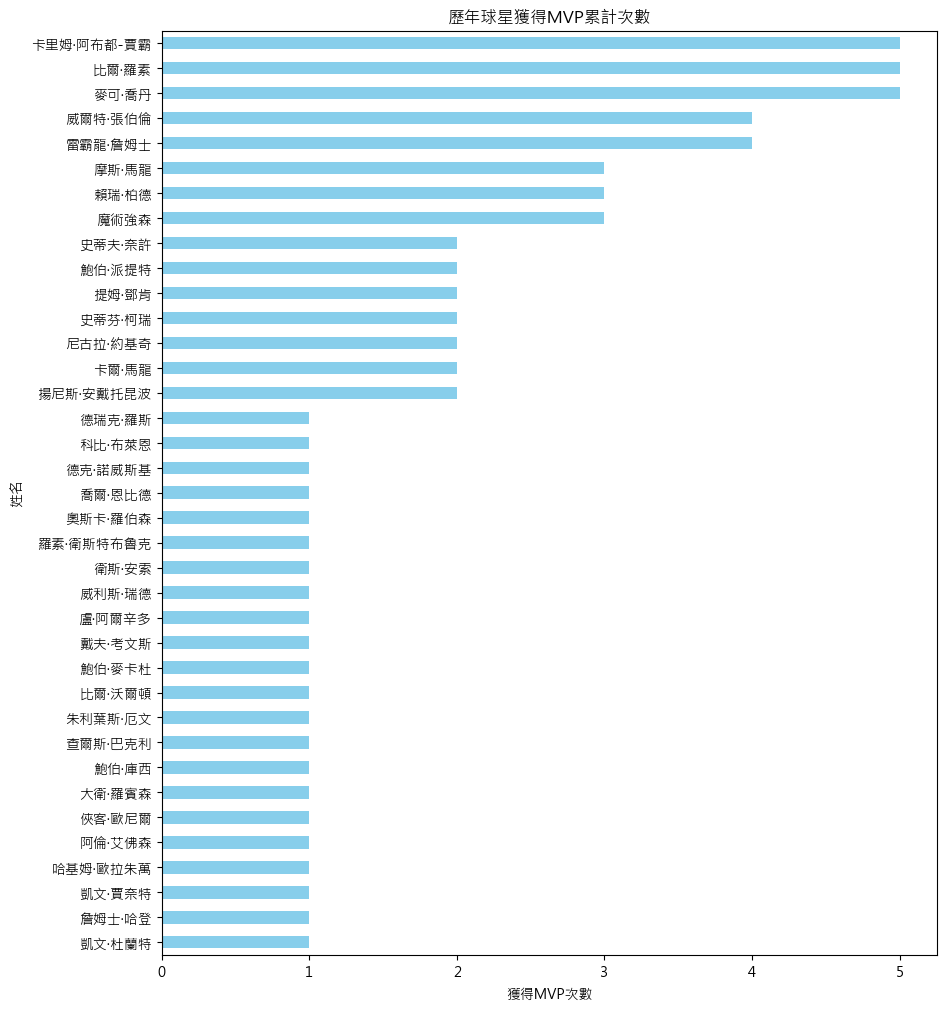

In [63]:
# 使用Pandas進行詩人作品數量的統計
poet_work_counts = df['姓名'].value_counts()

#調整字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
plt.rcParams['axes.unicode_minus'] = False

# 繪製長條圖
plt.figure(figsize=(10, 12))
poet_work_counts.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('獲得MVP次數')
plt.ylabel('姓名')
plt.title('歷年球星獲得MVP累計次數')
plt.show()

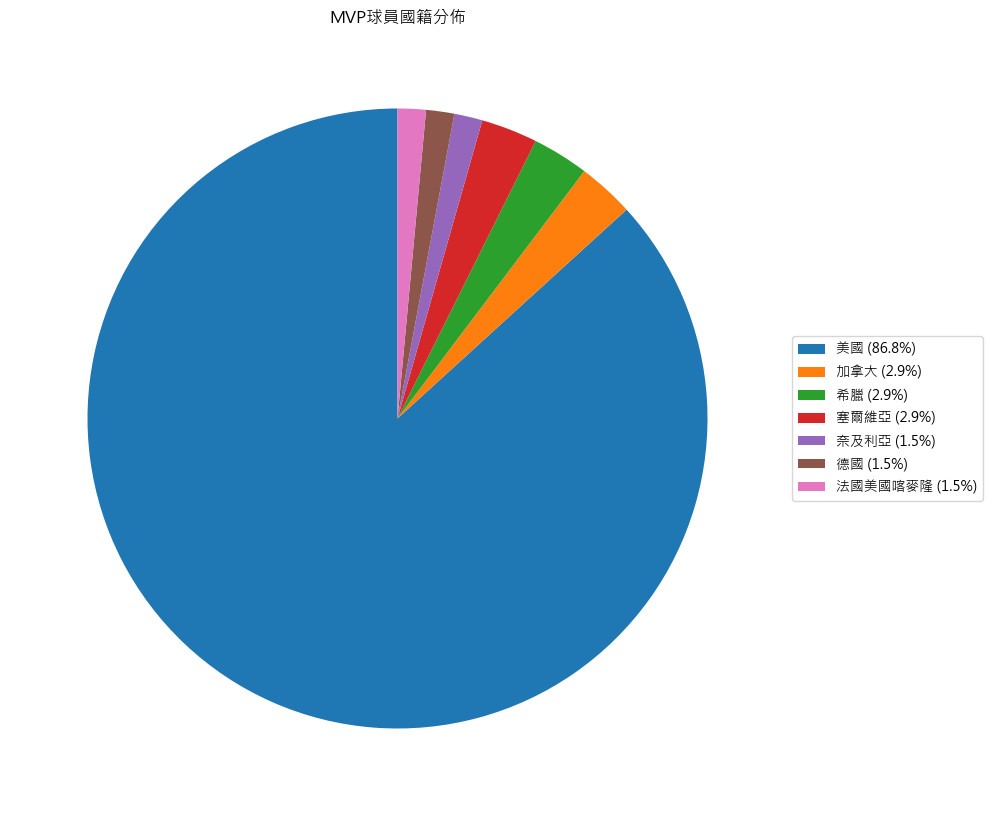

In [83]:
plt.figure(figsize=(10, 12))

# 計算每個國籍的數量
nationality_counts = df['國籍'].value_counts()

# 創建圓餅圖
plt.pie(nationality_counts, autopct='', startangle=90, textprops={'fontsize': 10})

# 製作圖例
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(nationality_counts.index, nationality_counts / nationality_counts.sum() * 100)]
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

# 添加標題
plt.title('MVP球員國籍分佈')

plt.show()